#Mini LA Assignment 3 - Recommendation System
#### **Authors**: Yutong Shen, Jingfei Chen, Yiran Wang

**Tasks:**

- The design plan of your recommender system (i.e., data source, algorithm(s)/rules, evaluation plan)

- Reproducible code for your algorithms

- Demonstrate the two types of recommendations: (a) a hypothetical brand-new learner (with background info) and (b) a hypothetical returning learner (with background info and some learning history)

- A brief discussion on your plan (e.g., pros/cons, what extra data is needed, challenges)

**Background:**

As the amount of educational data available to us has grown, the task of organizing and making use of it has become more daunting. Duval (2011) saw recommender systems as a way to deal with the “paradox of choice”, the dilemma of determining what information to feed back to learners about their learning. An idealized recommender system provides a limited number of suggested metrics or new content based on the learner’s past behavior and the patterns of all other learners in the sample. Recommender systems may provide behavioral cues, new content, insights or suggested behavioral changes based on a comparison of the learner to all other learners in the system.

**DataSets:**

1. studentRegistration.csv


- code_module: Course name, for which student registered
- code_presentation: Semester name, for which student registered
- id_student: Unique student identifier, connects to dataset student
- date_registration: Date of student registration to course in days from official start. It can be negative - student registered before course started.
- date_unregistration: Date of student deregistered from course in days from official start. It can be negative - student deregistered before course started. NA value means that student finished course.

2. studentInfo.csv.

- code_module: Name of course, for which student registered
- code_presentation: Name of semester, for which student registered
- id_student: Unique integer identifiing each student
- gender: Students gender
- region: UK region, in which student lives
- highest_education: Highest education student achieved before taking course
- imd_band: Index of Multiple Deprivation (see https://www.gov.uk/government/statistics/english-indices-of-deprivation-2015) percentile, students with imd_band lower than 20 comes from the most deprived regions
- age_band: Age band of student
- num_of_prev_attempts: Number of student previous attempts on the selected course
- studied_credits: Total credits student is studiing at the Open University during period of the course
- disability: Student claims disability of any type, logical
- final_result: Student final result in the course


**Problem & Purpose:**

Designing and creating a recommender system for an online learning system with limited number of learning modules. This recommender system will suggest which module(s) a person should register.

The recommender system will be able to:
- (a) make a reasonable suggestion to a brand new learner (with or without background information), and
- (b) make a reasonable suggestion to a learner based on the prior history.

### 1. Import Datasets

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
info = pd.read_csv('studentInfo.csv')
info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [ ]:
registration = pd.read_csv('studentRegistration.csv')
registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


### 2. Data Processing

In [ ]:
# merge the two datasets
student = info.merge(registration, how='left', on=['code_module', 'code_presentation', 'id_student'])
student.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN


In [ ]:
# show summary statistics
student.describe()

,id_student,num_of_prev_attempts,studied_credits,date_registration,date_unregistration
count,3.259300e+04,32593.000000,32593.000000,32548.000000,10072.000000
mean,7.066877e+05,0.163225,79.758691,-69.411300,49.757645
std,5.491673e+05,0.479758,41.071900,49.260522,82.460890
min,3.733000e+03,0.000000,30.000000,-322.000000,-365.000000
25%,5.085730e+05,0.000000,60.000000,-100.000000,-2.000000
50%,5.903100e+05,0.000000,60.000000,-57.000000,27.000000
75%,6.444530e+05,0.000000,120.000000,-29.000000,109.000000
max,2.716795e+06,6.000000,655.000000,167.000000,444.000000


In [ ]:
# check for missing values
student.isnull().sum()

code_module                 0
code_presentation           0
id_student                  0
gender                      0
region                      0
highest_education           0
imd_band                 1111
age_band                    0
num_of_prev_attempts        0
studied_credits             0
disability                  0
final_result                0
date_registration          45
date_unregistration     22521
dtype: int64

In [ ]:
student[student.isnull().any(axis=1)].head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,-110.0,NaN


In [ ]:
# fill the missing values in date_unregistration with 0
student_filled = student.fillna(10000)
student_filled

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,10000.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,10000.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,10000.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,10000.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0,10000.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,10000.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,-49.0,101.0


In [ ]:
# create a new column finished from date_unregistration to represent whether the student finished the course
d = {10000: 1}
student_filled['finished'] = student_filled['date_unregistration'].map(d)
student_filled = student_filled.fillna(0)
student_filled.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,finished
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,10000.0,1.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,10000.0,1.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,0.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,10000.0,1.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,10000.0,1.0


In [ ]:
# check for the distribution of values for num_of_prev_attempts
student_filled['num_of_prev_attempts'].value_counts(normalize=True)

0    0.871997
1    0.101218
2    0.020710
3    0.004357
4    0.001197
5    0.000399
6    0.000123
Name: num_of_prev_attempts, dtype: float64

In [ ]:
# show the unique values of final_result
student_filled['final_result'].unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

In [ ]:
# check for the distribution of values for final_result
student_filled['final_result'].value_counts(normalize=True)

Pass           0.379253
Withdrawn      0.311601
Fail           0.216365
Distinction    0.092781
Name: final_result, dtype: float64

In [ ]:
# create a new column final_grade to represent each student's final result numerically
r = {'Pass': 1, 'Withdrawn': 0, 'Fail': -1, 'Distinction': 2}
student_mapped = student_filled.copy()
student_mapped['final_grade'] = student_filled['final_result'].map(r)
student_mapped.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,finished,final_grade
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,10000.0,1.0,1
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,10000.0,1.0,1
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,0.0,0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,10000.0,1.0,1
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,10000.0,1.0,1


In [ ]:
# # show the unique values of highest_education
student_mapped['highest_education'].unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [ ]:
# create a new column highestEducation to represent each student's highest education numerically
e = {'HE Qualification': 3, 'A Level or Equivalent': 2, 'Lower Than A Level': 1, 'Post Graduate Qualification': 4, 'No Formal quals': 0}
student_mapped['highestEducation'] = student_filled['highest_education'].map(e)
student_mapped.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,finished,final_grade,highestEducation
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,10000.0,1.0,1,3
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,10000.0,1.0,1,3
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,0.0,0,2
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,10000.0,1.0,1,2
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,10000.0,1.0,1,1


In [ ]:
# create a new column Gender to represent each student's gender numerically
s = {'M': 0, 'F': 1}
student_mapped['Gender'] = student_mapped['gender'].map(s)
student_mapped.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,finished,final_grade,highestEducation,Gender
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,10000.0,1.0,1,3,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,10000.0,1.0,1,3,1
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,0.0,0,2,1
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,10000.0,1.0,1,2,1
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,10000.0,1.0,1,1,1


In [ ]:
# create a dataset with rows being the seven course names while the columns are the mean of the number of student previous attempts on the selected course and whether the student finished the course
course = student_filled.groupby('code_module')[['num_of_prev_attempts', 'finished']].mean()
course

,num_of_prev_attempts,finished
code_module,,
AAA,0.054813,0.831551
BBB,0.211025,0.699456
CCC,0.053000,0.560893
DDD,0.248087,0.643654
EEE,0.054192,0.755283
FFF,0.202654,0.693378
GGG,0.034333,0.885951


In [ ]:
# create a dataset with rows being the seven course names while the columns are the mean of the number of student previous attempts on the selected course and the student's final grade for the course
course2 = student_mapped.groupby('code_module')[['num_of_prev_attempts', 'final_grade']].mean()
course2

,num_of_prev_attempts,final_grade
code_module,,
AAA,0.054813,0.647059
BBB,0.211025,0.336831
CCC,0.053000,0.314614
DDD,0.248087,0.252073
EEE,0.054192,0.492161
FFF,0.202654,0.335867
GGG,0.034333,0.466456


In [ ]:
course3 = student_mapped.groupby('code_module')[['num_of_prev_attempts', 'final_grade', 'finished', 'Gender', 'highestEducation']].mean()
# sort the dataset based on students' highest education
course3.sort_values(by='highestEducation', ascending=False)

,num_of_prev_attempts,final_grade,finished,Gender,highestEducation
code_module,,,,,
AAA,0.054813,0.647059,0.831551,0.419786,2.057487
CCC,0.053000,0.314614,0.560893,0.248309,1.957375
EEE,0.054192,0.492161,0.755283,0.114860,1.858214
DDD,0.248087,0.252073,0.643654,0.401467,1.804528
FFF,0.202654,0.335867,0.693378,0.182170,1.706905
BBB,0.211025,0.336831,0.699456,0.883930,1.635352
GGG,0.034333,0.466456,0.885951,0.806235,1.388713


### 3. Content-Based Recommender

**3.1. Use the nearest neighbor method measured by euclidean distance**

1. RS based on **num_of_prev_attempts** and **finished**

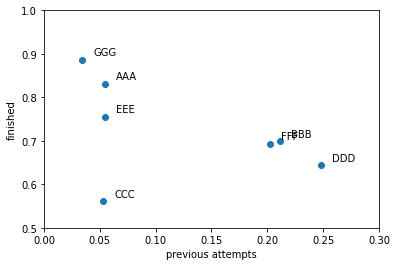

In [ ]:
import matplotlib.pyplot as plt
# Plot the basic scatter plot
plt.scatter(course.num_of_prev_attempts, course.finished)

# Add lables to each point
for i, index in enumerate (course.index):
    plt.text(course.num_of_prev_attempts[i]+0.01, course.finished[i]+0.01, index)
    
# Adjust the axis limit and label
plt.xlim (0, 0.3)
plt.ylim (0.5, 1)
plt.xlabel("previous attempts")
plt.ylabel("finished");

In [ ]:
# Create a new column called distance. And assign 0 to all rows temporarily.
course_distance = course.copy()
course_distance['distance'] = 0

# Pick AAA to start.
item = course_distance.loc['AAA',]

# Loop around the data frame index; Obtain the target row; Calculate the distance
# Assign to d; And assign to the corresponding cell.
for i in course_distance.index:
    target = course_distance.loc[i,]
    d = np.linalg.norm(item - target)
    course_distance.loc[i, 'distance'] = d

# Sort the result by distance
course_distance.sort_values('distance', ascending=True)

,num_of_prev_attempts,finished,distance
code_module,,,
AAA,0.054813,0.831551,0.000000
GGG,0.034333,0.885951,0.058128
EEE,0.054192,0.755283,0.076270
FFF,0.202654,0.693378,0.202358
BBB,0.211025,0.699456,0.204576
DDD,0.248087,0.643654,0.269555
CCC,0.053000,0.560893,0.270664


Based on the distance, AAA is mostly similar to GGG considering both num_of_prev_attempts and finished while CCC is the least similar. As a result, based on the current item AAA, we would recommend GGG.

2. RS based on **num_of_prev_attempts** and **final_grade**

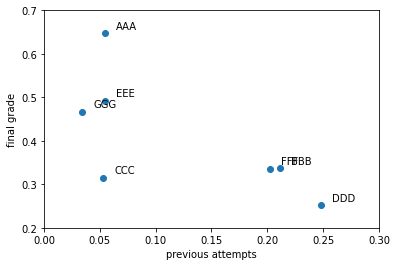

In [ ]:
import matplotlib.pyplot as plt
# Plot the basic scatter plot
plt.scatter(course2.num_of_prev_attempts, course2.final_grade)

# Add lables to each point
for i, index in enumerate (course.index):
    plt.text(course2.num_of_prev_attempts[i]+0.01, course2.final_grade[i]+0.01, index)
    
# Adjust the axis limit and label
plt.xlim (0, 0.3)
plt.ylim (0.2, 0.7)
plt.xlabel("previous attempts")
plt.ylabel("final grade");

In [ ]:
# Create a new column called distance. And assign 0 to all rows temporarily.
course2_distance = course2.copy()
course2_distance['distance'] = 0

# Pick AAA to start.
item = course2_distance.loc['AAA',]

# Loop around the data frame index; Obtain the target row; Calculate the distance
# Assign to d; And assign to the corresponding cell.
for i in course2_distance.index:
    target = course2_distance.loc[i,]
    d = np.linalg.norm(item - target)
    course2_distance.loc[i, 'distance'] = d

# Sort the result by distance
course2_distance.sort_values('distance', ascending=True)

,num_of_prev_attempts,final_grade,distance
code_module,,,
AAA,0.054813,0.647059,0.000000
EEE,0.054192,0.492161,0.154899
GGG,0.034333,0.466456,0.181760
CCC,0.053000,0.314614,0.332449
FFF,0.202654,0.335867,0.344525
BBB,0.211025,0.336831,0.347338
DDD,0.248087,0.252073,0.439737


Based on the distance, AAA is mostly similar to EEE considering both num_of_prev_attempts and final_grade while DDD is the least similar. As a result, based on the current item AAA, we would recommend EEE.

**3.2 Use the cosine similarity to measure the distance**

1. RS based on **num_of_prev_attempts** and **finished**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(course)
cosine_sim

array([[1.        , 0.97430231, 0.99959702, 0.95472384, 0.99998314,
        0.97621733, 0.99963315],
       [0.97430231, 1.        , 0.98030362, 0.99719837, 0.97559387,
        0.99996246, 0.96784427],
       [0.99959702, 0.98030362, 1.        , 0.96278394, 0.999745  ,
        0.98197799, 0.99846148],
       [0.95472384, 0.99719837, 0.96278394, 1.        , 0.95643527,
        0.99651283, 0.94631615],
       [0.99998314, 0.97559387, 0.999745  , 0.95643527, 1.        ,
        0.97745978, 0.99945902],
       [0.97621733, 0.99996246, 0.98197799, 0.99651283, 0.97745978,
        1.        , 0.96998745],
       [0.99963315, 0.96784427, 0.99846148, 0.94631615, 0.99945902,
        0.96998745, 1.        ]])

In [ ]:
# Create a index for the module
module_indices = pd.Series(range(len(course.index)), index = course.index)

module_indices

code_module
AAA    0
BBB    1
CCC    2
DDD    3
EEE    4
FFF    5
GGG    6
dtype: int64

In [ ]:
def get_recommendations(name, cosine_sim, matrix_indices):
    # Get the index of the course
    idx = matrix_indices[name]

    # Get the pairwsie similarity scores of all courses with that course
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the courses based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar courses
    sim_scores = sim_scores[1:7]

    # Get the course indices
    rank_indices = [i[0] for i in sim_scores]

    # Return the most similar courses
    return matrix_indices.iloc[rank_indices]

Now, we can make a quick query to find out which items are most similar to any given item.

In [ ]:
get_recommendations("AAA", cosine_sim, module_indices)

code_module
EEE    4
GGG    6
CCC    2
FFF    5
BBB    1
DDD    3
dtype: int64

Based on the cosine similarity measure, this time EEE is mostly similar to AAA while DDD is least similar to AAA.

2. RS based on **num_of_prev_attempts** and **final_grade**

In [ ]:
cosine_sim2 = cosine_similarity(course2)
cosine_sim2

array([[1.        , 0.88921527, 0.99660845, 0.76938407, 0.9996835 ,
        0.89676661, 0.99993909],
       [0.88921527, 1.        , 0.92384609, 0.97638586, 0.90044305,
        0.99985921, 0.88411171],
       [0.99660845, 0.92384609, 1.        , 0.81934022, 0.99836322,
        0.9301387 , 0.9956395 ],
       [0.76938407, 0.97638586, 0.81934022, 1.        , 0.78521075,
        0.97262341, 0.7622868 ],
       [0.9996835 , 0.90044305, 0.99836322, 0.78521075, 1.        ,
        0.90761502, 0.99934494],
       [0.89676661, 0.99985921, 0.9301387 , 0.97262341, 0.90761502,
        1.        , 0.89182799],
       [0.99993909, 0.88411171, 0.9956395 , 0.7622868 , 0.99934494,
        0.89182799, 1.        ]])

In [ ]:
get_recommendations("AAA", cosine_sim2, module_indices)

code_module
GGG    6
EEE    4
CCC    2
FFF    5
BBB    1
DDD    3
dtype: int64

Based on the cosine similarity measure, this time GGG is mostly similar to AAA while DDD is least similar to AAA.

### 4. Discussion

There are lots of missing data in imd_band (1111), date_registration (45), and especially in date_unregistration (22521). The variable date_unregistration is the date of student deregistered from course in days from official start. It can be negative - student deregistered before course started. NA value means that student finished course.
Thus, we fill the missing values in date_unregistration with 0 and create a new column finished from date_unregistration to represent whether the student finished the course. We have also create a new column final_grade to represent each student's final result numerically.

To make a reasonable suggestion to a learner based on the prior history, we choose to use the content-based recommender. We have use the the nearest neighbor method measured by euclidean distance and the cosine similarity to measure the distance.
And for both method, we have tried the model based on 1. course data: num_of_prev_attempts and finished, and 2. Course 2 data: num_of_prev_attempts and final_grade.

From the above results, we can see that EEE and GGG are always ranked in the top two and BBB and DDD are three times the lowest two. Thus, we would recommend courses EEE and GGG to the students and would not consider the BBB and DDD courses if the student have previous interest in courses AAA. Similarly, we can apply the model to students who are interested in other courses and see the result.

To make a reasonable suggestion to a brand new learner (with or without background information), we have the course3 dataset to show the mean score of the courses based on num_of_prev_attempts, final_grade	finished, Gender, and highestEducation. We have ranked the courses by highestEducation for we believed this could be the most important factor for the incoming students.

We do face some limitation for the suggestion for the new learners can only be assumed based on the general background information for different courses. Thus, the result might not be the most appropriate. Our recommendation system for the current students only use the data from num_of_prev_attempts, finished, and final_grade. More perspectives could taken into account in the future models.